In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./Oil_and_Gas_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

            Date Symbol Series  Prev Close    Open    High     Low    Last  \
0     2015-01-01   ONGC     EQ      341.35  340.25  344.75  340.10  343.70   
1     2015-01-02   ONGC     EQ      344.05  344.10  352.50  344.10  350.00   
2     2015-01-05   ONGC     EQ      349.20  347.00  358.00  346.00  353.50   
3     2015-01-06   ONGC     EQ      353.15  348.55  348.95  330.60  331.75   
4     2015-01-07   ONGC     EQ      333.15  333.00  341.55  328.10  338.60   
...          ...    ...    ...         ...     ...     ...     ...     ...   
9391  2021-04-26   BPCL     EQ      423.05  426.00  428.35  417.55  417.60   
9392  2021-04-27   BPCL     EQ      418.90  417.50  423.10  416.55  420.00   
9393  2021-04-28   BPCL     EQ      420.35  422.00  424.35  414.90  417.15   
9394  2021-04-29   BPCL     EQ      417.50  422.00  423.00  417.00  419.00   
9395  2021-04-30   BPCL     EQ      419.55  417.50  437.50  414.65  422.10   

       Close    VWAP    Volume      Turnover  Trades  Deliverab

In [3]:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [4]:
# Function for calculating the metrics of a model trained on a particular stock in the sector.
def stockMetrics(y_test, predictions):
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100
    
    return mse, rmse, mae, nrmse, actual_growth, predicted_growth

In [5]:
# Function for plotting the Actual vs Predicted Growth of each stock in a sector.
def stockActVsPred(stock_df, y_test, predictions):
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()

Epoch 1/10
30/30 [==============================] - 7s 81ms/step - loss: 0.0076 - val_loss: 0.0020
Epoch 2/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0034 - val_loss: 0.0047
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 6/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 7/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 8/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 9/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of RELIANCE:
MSE: 35440.01941658992, R

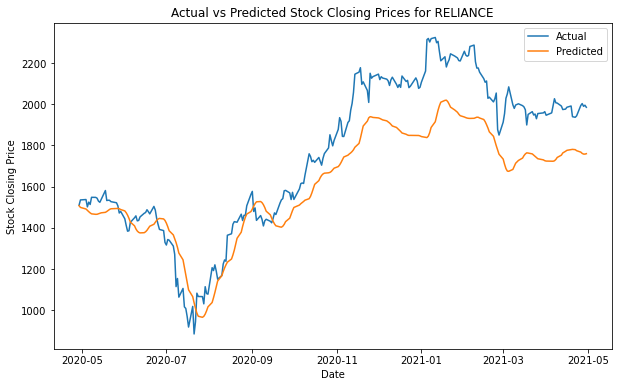

Epoch 1/10
30/30 [==============================] - 7s 91ms/step - loss: 0.0352 - val_loss: 0.0021
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0083 - val_loss: 0.0023
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0059 - val_loss: 0.0014
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0053 - val_loss: 0.0013
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 8/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 9/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of COALINDIA:
MSE: 382.35308040344165

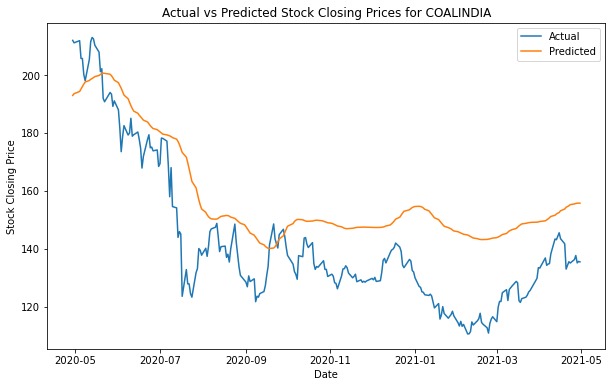

Epoch 1/10
30/30 [==============================] - 6s 60ms/step - loss: 0.0380 - val_loss: 0.0023
Epoch 2/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0087 - val_loss: 6.4184e-04
Epoch 3/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0083 - val_loss: 2.7171e-04
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0075 - val_loss: 7.5168e-04
Epoch 5/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0061 - val_loss: 2.3145e-04
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0063 - val_loss: 6.9574e-04
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0063 - val_loss: 2.9640e-04
Epoch 8/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0060 - val_loss: 3.0045e-04
Epoch 9/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0052 - val_loss: 4.5110e-04
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of IOC

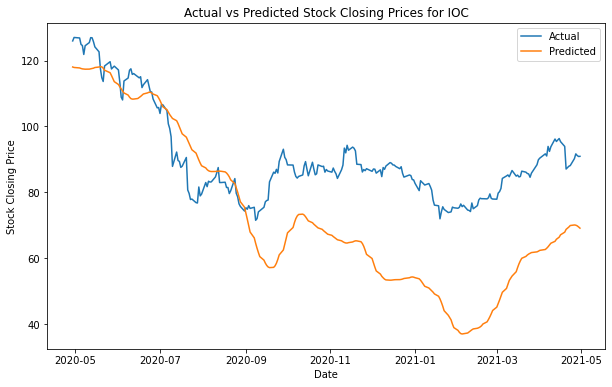

Epoch 1/10
30/30 [==============================] - 6s 58ms/step - loss: 0.0487 - val_loss: 0.0129
Epoch 2/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0079 - val_loss: 0.0112
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0077 - val_loss: 0.0113
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0068 - val_loss: 0.0090
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0068 - val_loss: 0.0117
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0064 - val_loss: 0.0087
Epoch 8/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0061 - val_loss: 0.0096
Epoch 9/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0064 - val_loss: 0.0115
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of GAIL:
MSE: 3499.5386139610955, RMSE

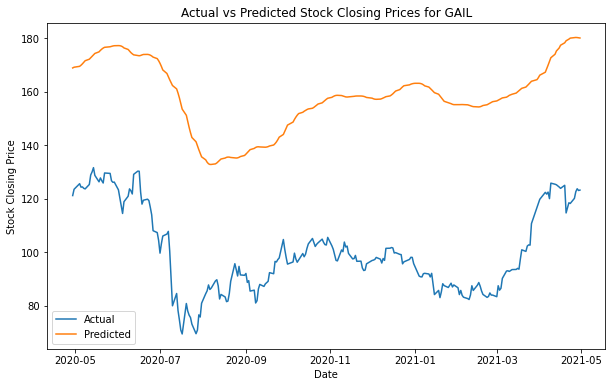

Epoch 1/10
30/30 [==============================] - 6s 63ms/step - loss: 0.0457 - val_loss: 0.0016
Epoch 2/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0083 - val_loss: 9.4591e-04
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0073 - val_loss: 8.9459e-04
Epoch 4/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0068 - val_loss: 9.0314e-04
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0065 - val_loss: 0.0011
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0059 - val_loss: 8.1354e-04
Epoch 8/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0059 - val_loss: 8.2024e-04
Epoch 9/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0058 - val_loss: 0.0015
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of BPCL:
MSE: 1188

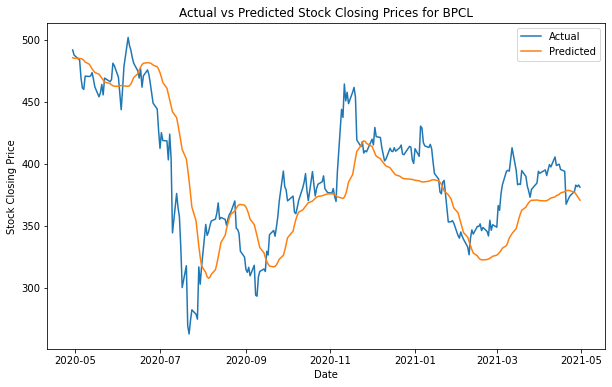

Epoch 1/10
30/30 [==============================] - 6s 58ms/step - loss: 0.0448 - val_loss: 0.0011
Epoch 2/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0080 - val_loss: 7.7921e-04
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0064 - val_loss: 0.0017
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0056 - val_loss: 7.5146e-04
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0056 - val_loss: 7.4893e-04
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 8/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0042 - val_loss: 7.2619e-04
Epoch 9/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0048 - val_loss: 6.7980e-04
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of ONGC:
MSE: 177

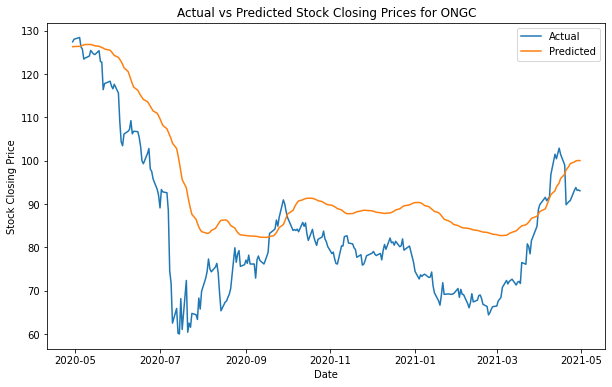

"for symbol, metrics in stock_metrics.items():\n    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')"

In [6]:
# Calculate rolling mean and standard deviation for the 'Close' column
df['50_day_mean'] = df['Close'].rolling(window=50).mean()
df['200_day_mean'] = df['Close'].rolling(window=200).mean()
df['50_day_std'] = df['Close'].rolling(window=50).std()
df['200_day_std'] = df['Close'].rolling(window=200).std()

# Drop rows with NaN values resulting from rolling calculations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Close', '50_day_mean', '200_day_mean', '50_day_std', '200_day_std']
target = 'Close'

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Dictionary to store metrics for each stock
stock_metrics = {}

# Process each stock
for symbol in df['Symbol'].unique():
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Scale features
    scaled_features = scaler.fit_transform(stock_df[features])
    scaled_target = scaler.fit_transform(stock_df[[target]])
    
    X, y = [], []
    dates = []  # List to store the corresponding dates for X and y
    time_steps = 30
    for i in range(time_steps, len(stock_df)):
        X.append(scaled_features[i-time_steps:i])
        y.append(scaled_target[i])
        dates.append(stock_df['Date'].iloc[i])  # Store the corresponding date
        
    X=np.array(X)
    y=np.array(y)
    
    # Convert dates list to a NumPy array for easier indexing
    dates = np.array(dates)
    
    '''# Create sequences
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i:(i + time_steps)])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)

    time_steps = 30
    X, y = create_dataset(scaled_features, scaled_target, time_steps)'''
    
    # Split into training and testing datasets based on the specified dates
    '''train_mask = stock_df['Date'] < pd.Timestamp('2020-01-01')
    test_mask = (stock_df['Date'] >= pd.Timestamp('2020-01-01')) & (stock_df['Date'] < pd.Timestamp('2021-01-01'))
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]'''
    
    # Now create masks based on the adjusted dates array
    train_mask = dates < pd.Timestamp('2020-01-01')
    test_mask = (dates >= pd.Timestamp('2020-01-01')) & (dates < pd.Timestamp('2021-01-01'))
    
    # Use these masks to split the data
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    
    # Build the LSTM model
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    '''# Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100'''
    
    mse, rmse, mae, nrmse, actual_growth, predicted_growth = stockMetrics(y_test, predictions)
    
    # Store metrics
    stock_metrics[symbol] = {
        'MSE': mse,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'Actual Growth %': actual_growth,
        'Predicted Growth %': predicted_growth
    }
    
    print(f'Metrics of {symbol}:')
    print(f'MSE: {mse}, RMSE: {rmse}, NRMSE: {nrmse}, MAE: {mae}, Actual Growth: {actual_growth}, Predicted Growth: {predicted_growth}')
    
    stockActVsPred(stock_df, y_test, predictions)

    '''# Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()'''

# Output metrics for each stock
'''for symbol, metrics in stock_metrics.items():
    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')'''
